In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [2]:
# Import DataSet
fraud = pd.read_csv("C:\Local Disk (A);\Excelr\Assignment Excelr\\14 Decision Tree\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [3]:
# Check Categorical Data (Dtype)
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
fraud = fraud.rename({'Marital.Status':'Marital_Status','Taxable.Income':'Taxable_Income','City.Population':'City_Population',
              'Work.Experience':'Work_Experience'}, axis=1)

In [5]:
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
# Convert Categorical data into numerical Form
encoder = LabelEncoder()

In [7]:
# Create dict which columns convert in numerical form
columns = {'Undergrad','Marital_Status','Urban'}
for i in columns:
    fraud[i] = encoder.fit_transform(fraud[i])

In [8]:
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int32
 1   Marital_Status   600 non-null    int32
 2   Taxable_Income   600 non-null    int64
 3   City_Population  600 non-null    int64
 4   Work_Experience  600 non-null    int64
 5   Urban            600 non-null    int32
dtypes: int32(3), int64(3)
memory usage: 21.2 KB


In [10]:
fraud.describe()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,1.046667,55208.375000,108747.368333,15.558333,0.503333
std,0.500017,0.821958,26204.827597,49850.075134,8.842147,0.500406
min,0.000000,0.000000,10003.000000,25779.000000,0.000000,0.000000
25%,0.000000,0.000000,32871.500000,66966.750000,8.000000,0.000000
50%,1.000000,1.000000,55074.500000,106493.500000,15.000000,1.000000
75%,1.000000,2.000000,78611.750000,150114.250000,24.000000,1.000000
max,1.000000,2.000000,99619.000000,199778.000000,30.000000,1.000000


In [11]:
# Check Null values
fraud.isnull().sum()

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

In [12]:
fraud.duplicated().sum()

0

In [13]:
# Correlation Between all elements
fraud.corr()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
Undergrad,1.000000,0.042407,-0.049232,0.079579,-0.005362,-0.000267
Marital_Status,0.042407,1.000000,-0.012944,-0.001564,-0.002213,0.064562
Taxable_Income,-0.049232,-0.012944,1.000000,-0.064387,-0.001818,0.070628
City_Population,0.079579,-0.001564,-0.064387,1.000000,0.013135,-0.040098
Work_Experience,-0.005362,-0.002213,-0.001818,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.070628,-0.040098,-0.094559,1.000000


<AxesSubplot:>

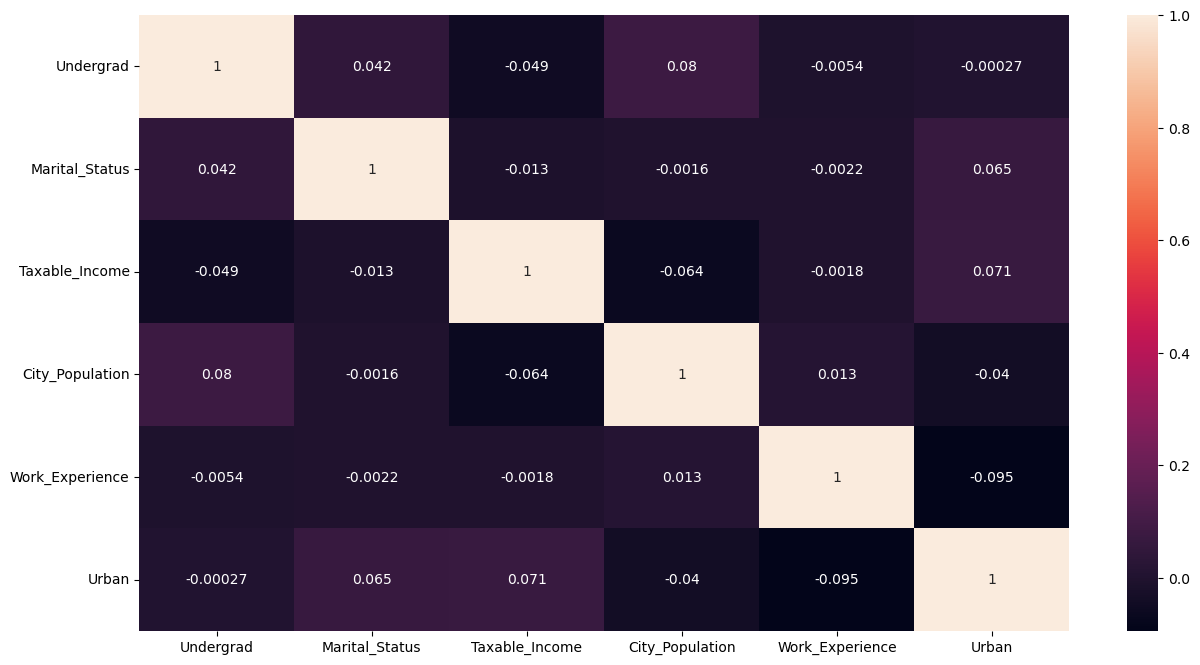

In [14]:
plt.figure(figsize=(15,8))
sns.heatmap(fraud.corr(), annot=True)

# Convert Sales Column into Categorical Form

In [15]:
# Change Numerical Sales into High and Low using if else Condition
Tax_Remarks = []
for value in fraud['Taxable_Income']:
    if value <= 30000:
        Tax_Remarks.append('Risky')
    else:
        Tax_Remarks.append('Good')
fraud['Tax_Remarks'] = Tax_Remarks

In [16]:
fraud

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,Tax_Remarks
0,0,2,68833,50047,10,1,Good
1,1,0,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,2,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,0,76340,39492,7,1,Good
596,1,0,69967,55369,2,1,Good
597,0,0,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


In [34]:
fraud.Tax_Remarks.value_counts()

Good     476
Risky    124
Name: Tax_Remarks, dtype: int64

# Preprocessing

In [23]:
# Split Independent and Dependent Variable usling Slicing
X = fraud.iloc[:,[0,1,3,4,5]]
y = fraud.iloc[:,[6]]

In [24]:
X

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [25]:
y

,Tax_Remarks
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [46]:
# Split Train and test Data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
X_train

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
46,1,1,137346,27,1
263,1,1,69386,21,1
458,1,2,110892,18,1
230,0,1,81593,14,1
107,0,1,52424,6,1
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [48]:
y_train

,Tax_Remarks
46,Good
263,Good
458,Risky
230,Risky
107,Good
...,...
277,Good
9,Good
359,Good
192,Good


In [49]:
X_test

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
434,1,2,87188,19,1
122,1,1,140762,26,0
224,0,1,55717,25,1
479,1,1,68995,21,0
205,0,1,131906,20,1
...,...,...,...,...,...
598,1,1,180083,17,0
89,1,1,176050,20,0
382,1,0,139269,29,0
408,1,0,77059,22,0


In [50]:
y_test

,Tax_Remarks
434,Risky
122,Risky
224,Good
479,Good
205,Risky
...,...
598,Good
89,Risky
382,Good
408,Good


# Decision Tree Model Building (Using Entropy Method)

In [54]:
# Model building
classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [55]:
# Prediction of test Values
y_pred = classifier.predict(X_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
  

In [56]:
pd.Series(y_pred).value_counts()

Good     146
Risky      4
dtype: int64

In [57]:
# Check Confusion Matrix Table
cm = confusion_matrix(y_test,y_pred)
cm

array([[110,   3],
       [ 36,   1]], dtype=int64)

In [58]:
# Check Accuracy Score
acc = accuracy_score(y_test,y_pred)
acc

0.74

In [59]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

        Good       0.75      0.97      0.85       113
       Risky       0.25      0.03      0.05        37

    accuracy                           0.74       150
   macro avg       0.50      0.50      0.45       150
weighted avg       0.63      0.74      0.65       150



Text(0.5, 1.0, 'Decision tree using Entropy')

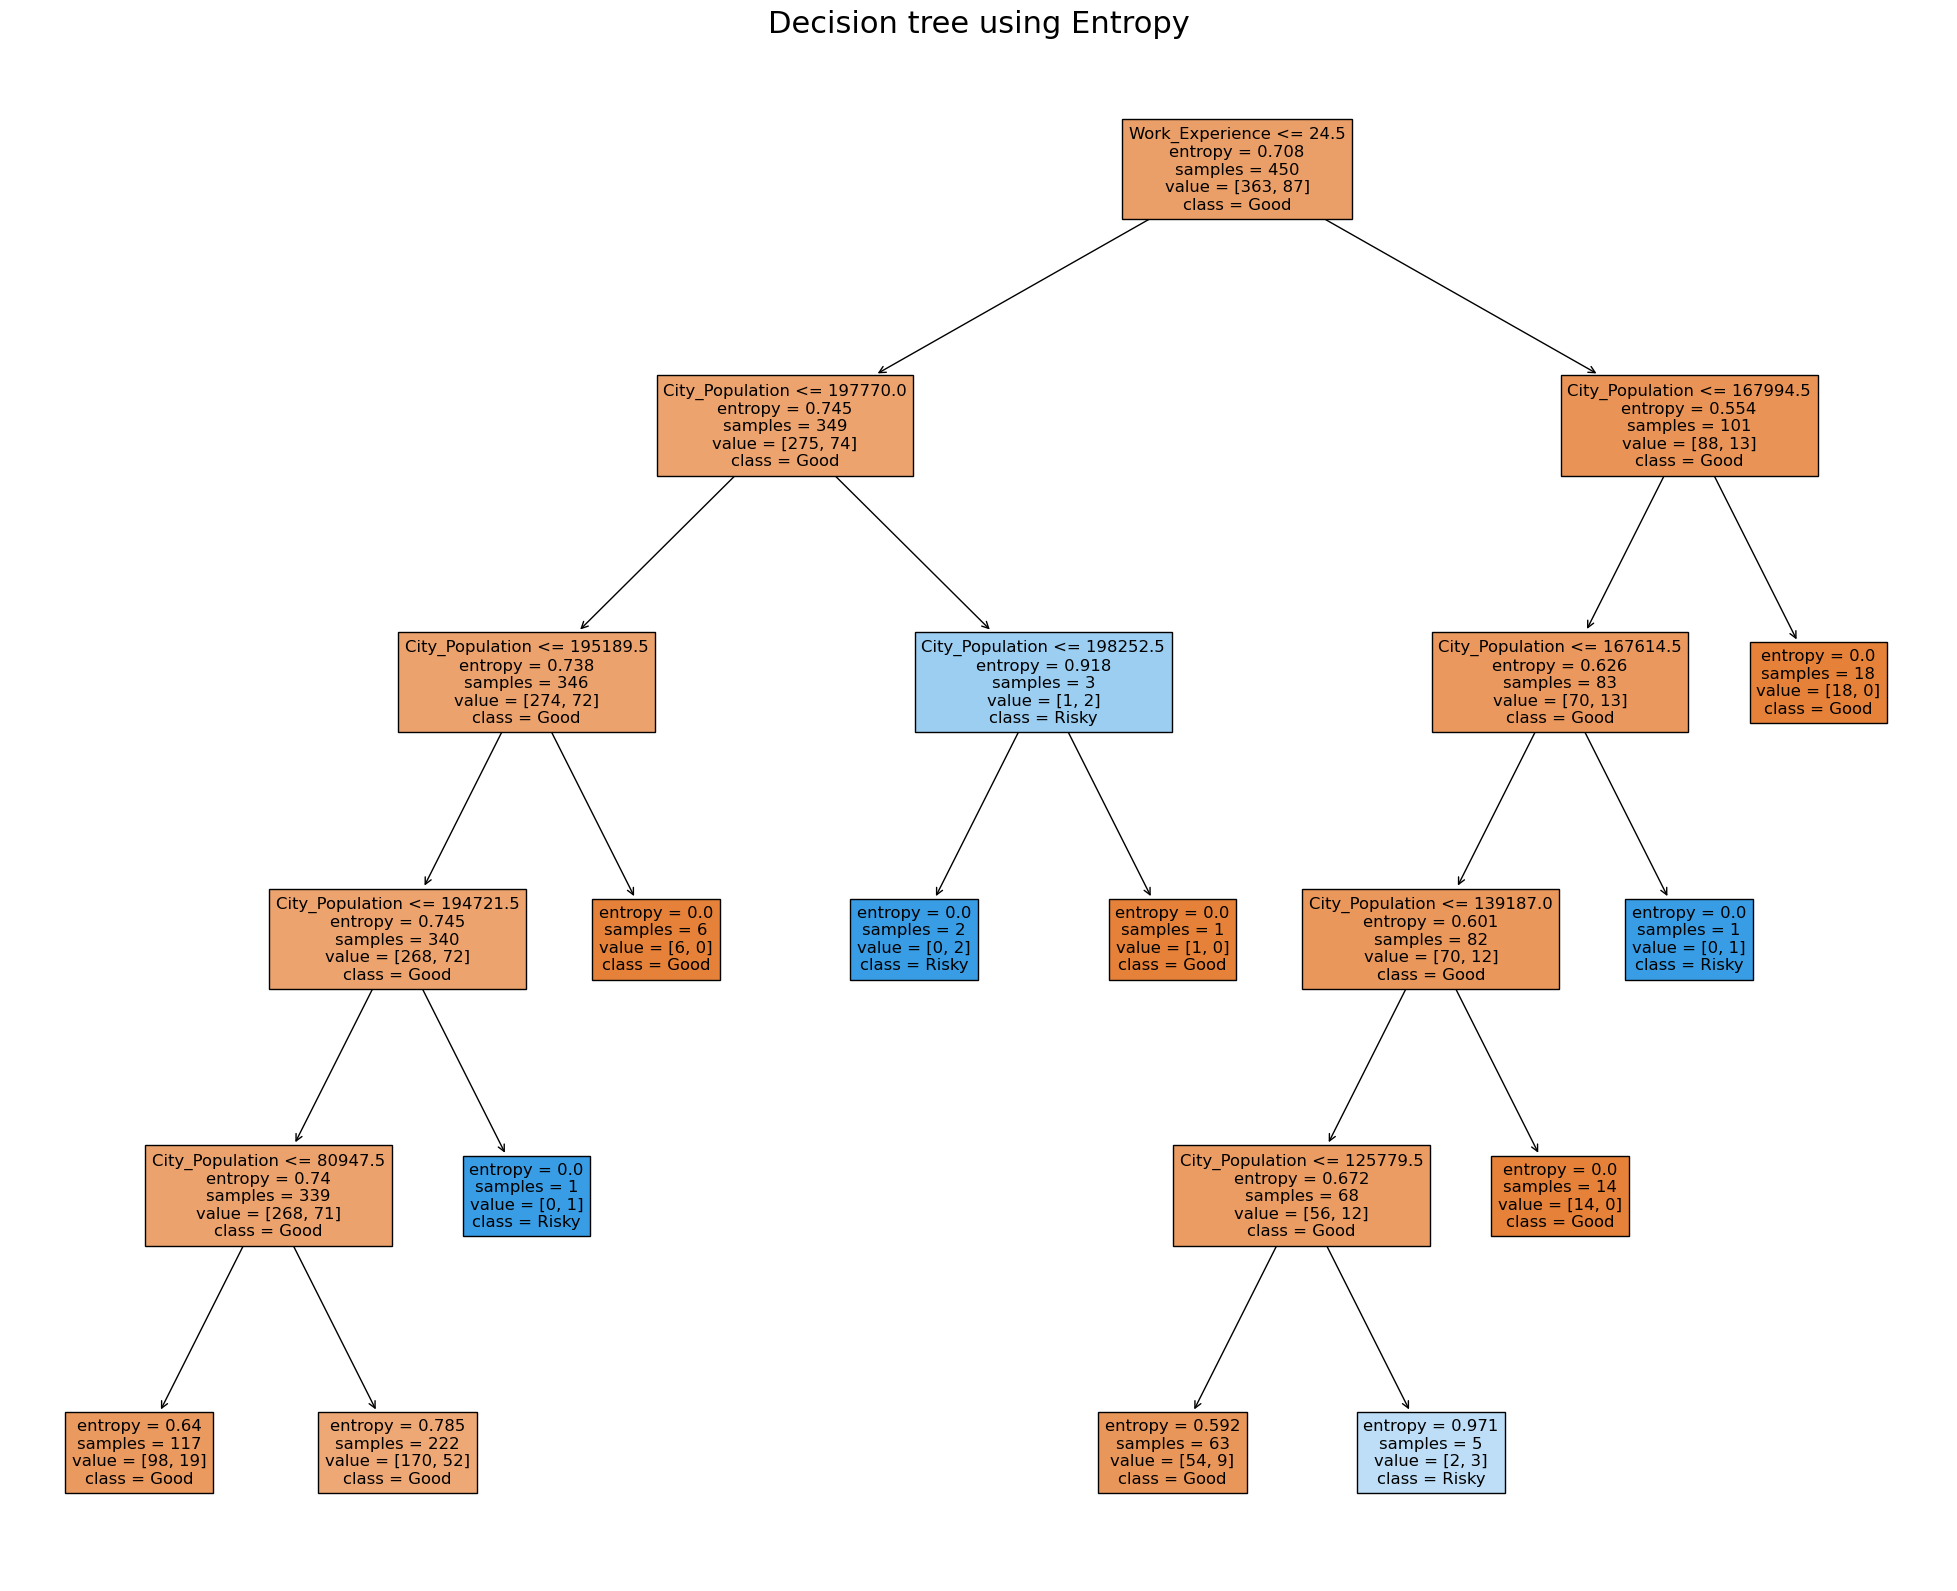

In [72]:
# Decision tree Visulization.
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(classifier,
                     feature_names= ['Undergrad', 'Marital_Status','City_Population','Work_Experience','Urban'], 
                     class_names= ['Good', 'Risky'], filled=True)
plt.title('Decision tree using Entropy',fontsize=22)

# Decision Tree Model Building (Using Gini Method)

In [64]:
# Model Building
classifier1 = DecisionTreeClassifier(criterion='gini', max_depth=5)
classifier1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [65]:
# Prediction of test values
y_pred = classifier1.predict(X_test)
y_pred

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
 

In [66]:
pd.Series(y_pred).value_counts()

Good     143
Risky      7
dtype: int64

In [67]:
# Check confusion Matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[109,   4],
       [ 34,   3]], dtype=int64)

In [68]:
# Check Accuracy Score
acc = accuracy_score(y_test,y_pred)
acc

0.7466666666666667

In [69]:
# Classification Report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

        Good       0.76      0.96      0.85       113
       Risky       0.43      0.08      0.14        37

    accuracy                           0.75       150
   macro avg       0.60      0.52      0.49       150
weighted avg       0.68      0.75      0.68       150



Text(0.5, 1.0, 'Decision tree using Gini')

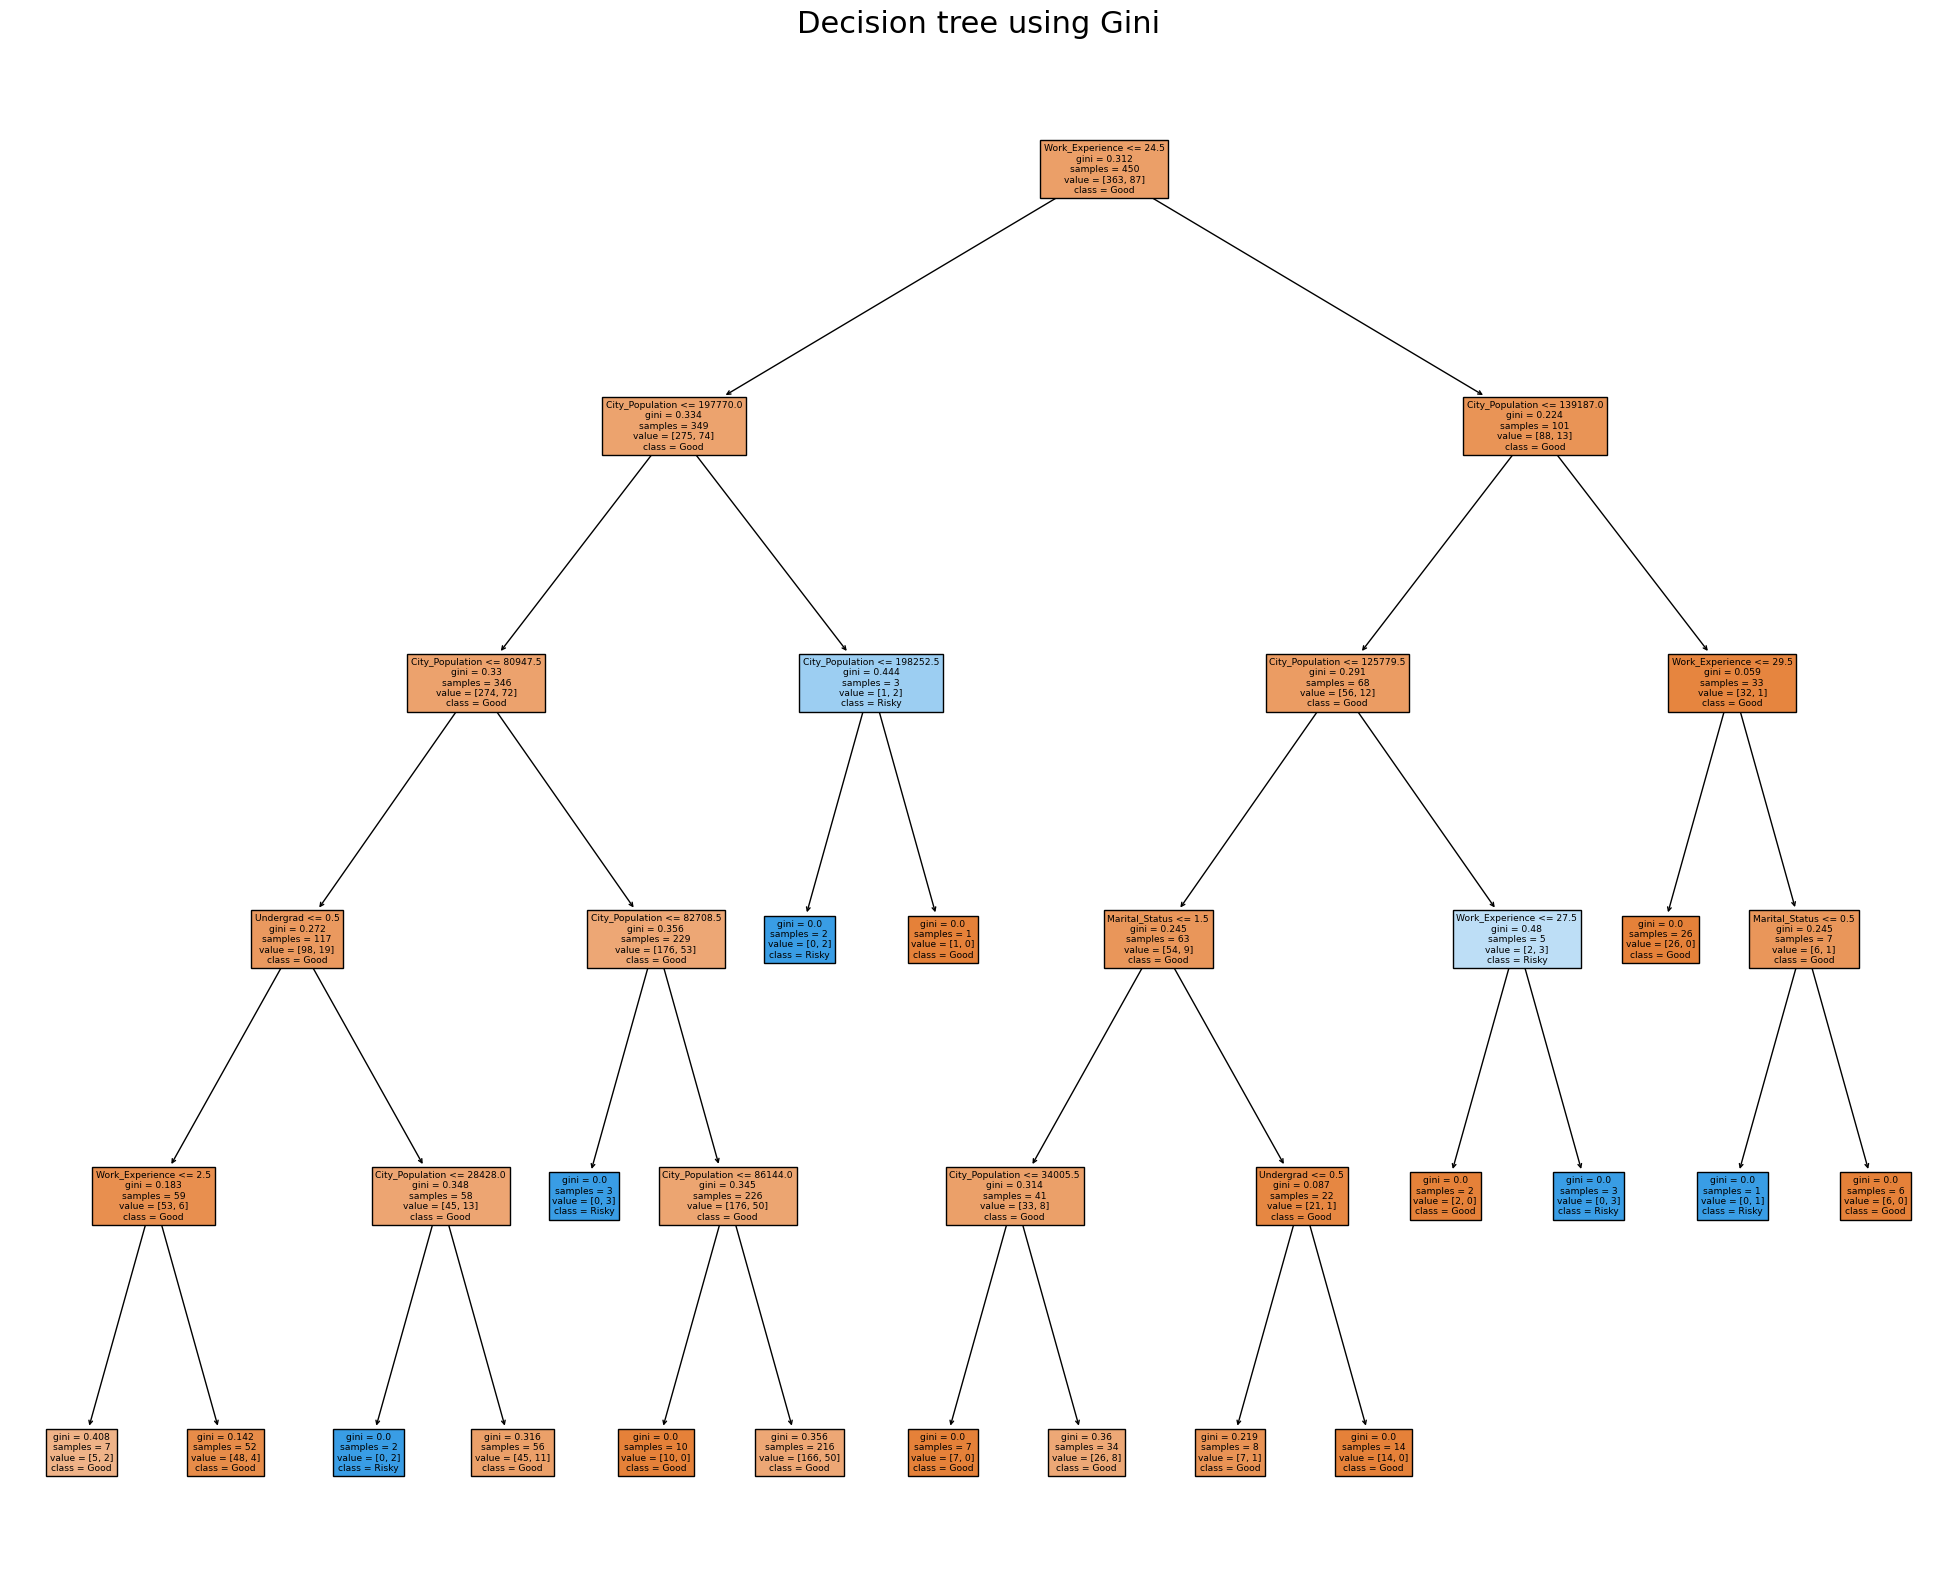

In [73]:
# Decision tree Visulization.
fig = plt.figure(figsize=(25,20))
fig = tree.plot_tree(classifier1,
                     feature_names= ['Undergrad', 'Marital_Status','City_Population','Work_Experience','Urban'], 
                     class_names= ['Good', 'Risky'], filled=True)
plt.title('Decision tree using Gini',fontsize=22)